In [13]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('weight-height.csv')

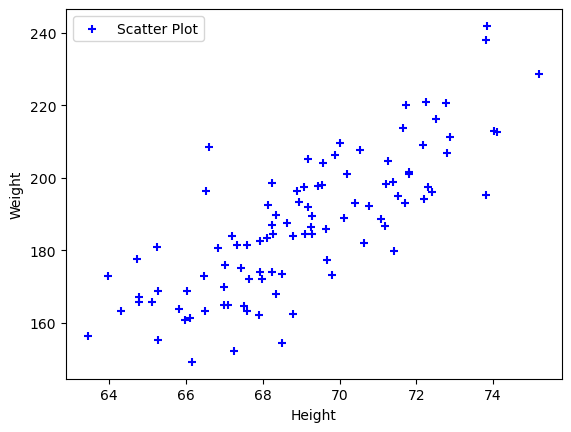

In [15]:
plt.scatter(df['Height'], df['Weight'], label='Scatter Plot', color='blue', marker='+')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

In [16]:
X = df['Height']
y = df['Weight']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [18]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
def costFunc(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [20]:
def computeGradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_hat = w * x[i] + b
        dj_dw_i = (y_hat - y[i]) * x[i]
        dj_db_i = y_hat - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [108]:
def gradient_descent(x, y, w, b, alpha, iterations):
    J_hist = []  # Initialize a list to store cost values during iterations
    p_hist = []  # Initialize a list to store parameter values during iterations

    for i in range(iterations):
        dj_dw, dj_db = computeGradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = costFunc(x, y, w, b)

        J_hist.append(cost)
        p_hist.append((w, b))
    
#     print(J_hist)
    return w, b, J_hist, p_hist

In [110]:
# Example usage:
w_init = 0
b_init = 0
iterations = 4500  # Increase the number of iterations for better convergence
tmp_alpha = 2.0e-7  # Reduce the learning rate

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)

print(f"The final cost is {J_hist[-1]:0.3f}\n The Final w is : {w_final:0.3f}\n The Final b is : {b_final:0.3f}")


The final cost is 99.642
 The Final w is : 2.687
 The Final b is : 0.039


In [124]:
# fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
# ax1.plot(J_hist[:100])
# ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
# ax1.set_title("Cost vs. iteration (start)")
# ax2.set_title("Cost vs. iteration (end)")
# ax1.set_ylabel('Cost')
# ax2.set_ylabel('Cost')
# ax1.set_xlabel('Iteration step')
# ax2.set_xlabel('Iteration step')


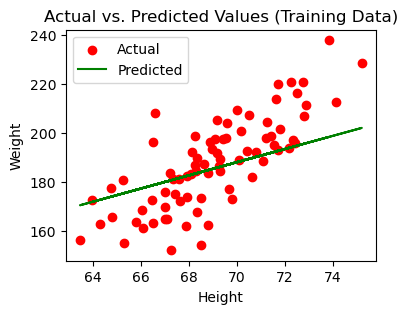

In [125]:
y_train_predicted = w_final * x_train + b_final

# Plot actual vs. predicted values for training dataset
plt.figure(figsize=(4, 3))
plt.scatter(x_train, y_train, label='Actual', color='red', marker='o', alpha=1)
plt.plot(x_train, y_train_predicted, label='Predicted', color='green', alpha=1)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('Actual vs. Predicted Values (Training Data)')

plt.show()

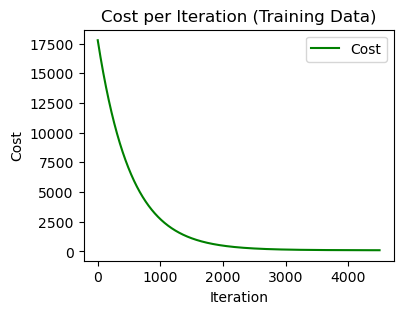

In [126]:
plt.figure(figsize=(4, 3))
plt.plot(range(iterations), J_hist, label='Cost', color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Training Data)')

plt.show()

In [127]:
# Example usage:
w_init = 0
b_init = 0
iterations = 4500  # Increase the number of iterations for better convergence
tmp_alpha = 2.0e-7  # Reduce the learning rate

w_final, b_final, J_hist, p_hist = gradient_descent(x_test, y_test, w_init, b_init, tmp_alpha, iterations)

print(f"The final cost is {J_hist[-1]:0.3f}\n The Final w is : {w_final:0.3f}\n The Final b is : {b_final:0.3f}")


The final cost is 126.230
 The Final w is : 2.625
 The Final b is : 0.038


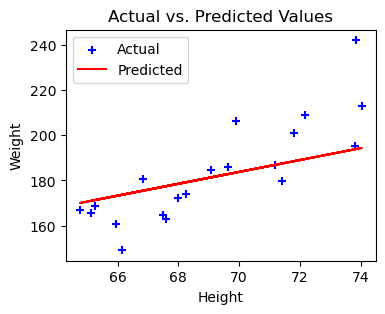

In [128]:
y_predicted = w_final * x_test + b_final

# Plot actual vs. predicted values
plt.figure(figsize=(4, 3))
plt.scatter(x_test, y_test, label='Actual', color='blue', marker='+', alpha=1)
plt.plot(x_test, y_predicted, label='Predicted', color='red', alpha=1)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('Actual vs. Predicted Values')

plt.show()



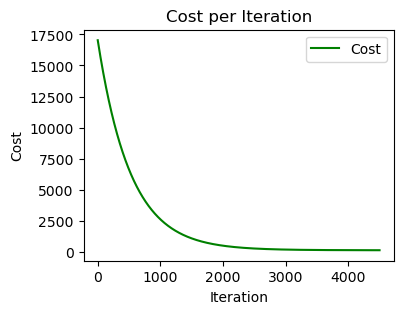

In [129]:
# Plot cost per iteration
plt.figure(figsize=(4, 3))
plt.plot(range(iterations), J_hist, label='Cost', color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration')

plt.show()

In [131]:
h = 98.847017
# we = 241.893563
y_pre = w_final * h + b_final
print(y_pre)

259.46997052299946
